In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2
import tqdm


In [14]:
#importing data
classes_train = pd.read_csv('../data/train/_classes.csv')
classes_test = pd.read_csv('../data/test/_classes.csv')
classes_valid = pd.read_csv('../data/valid/_classes.csv')

pics_train = []
pics_valid = []
pics_test = []


for filename in classes_train['filename']:
    img = cv2.imread('../data/train/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.resize(img, (224, 224))
    pics_train.append(img)

for filename in classes_valid['filename']:
    img = cv2.imread('../data/valid/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.resize(img, (224, 224))
    pics_valid.append(img)

for filename in classes_test['filename']:
    img = cv2.imread('../data/test/'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.resize(img, (224, 224))
    pics_test.append(img)


In [15]:
pics_train = np.array(pics_train)
pics_valid = np.array(pics_valid)
pics_test = np.array(pics_test)




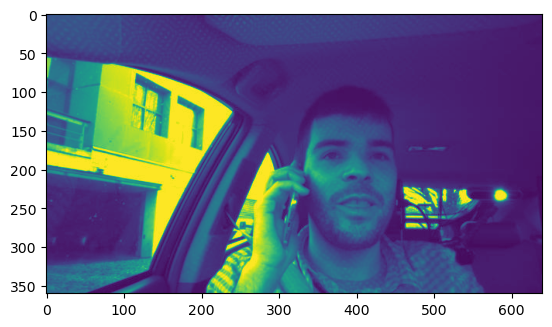

In [18]:
def crop_face(image):
    """
    Crops the face from input image using Haar Cascade Classifier

    Args:
        image: image

    Returns:
        face: face image
    """
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(image, 1.1, 4)
    if len(faces) == 0:
        return None
    for (x, y, w, h) in faces:
        face = cv2.resize(image[y-30:y+30+h, x-30:x+w+30], (160, 160))
    return face


# faces = []
# for image in tqdm.tqdm(pics_train):
#     face = crop_face(image)
#     if face is not None:
#         faces.append(face)

plt.imshow(pics_train[0])
    
